In [2]:
import pandas as pd
import numpy as np
from numpy import NaN as NA
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

In [4]:
import statsmodels.api as sm
from sklearn import preprocessing
import sklearn.linear_model as lm
import sklearn.neighbors as knn

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

In [6]:
np.random.seed(1)

In [7]:
HF=pd.read_csv('House_Feature.csv')
PS1=pd.read_csv('Property_Survey_1.csv')
PS2=pd.read_csv('Property_Survey_2.csv')
QA=pd.read_csv('Quality_Assessment.csv')
PS = pd.concat([PS1, PS2])

In [8]:
print(HF.shape)
print(PS.shape)
print(QA.shape)

(2370, 23)
(2370, 4)
(2370, 3)


In [9]:
print(HF.columns)
print(PS.columns)
print(QA.columns)

Index(['PID', 'YearBuilt', 'YearRemodel', 'VeneerExterior', 'BsmtFinTp',
       'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars',
       'GarageArea', 'WdDckSqft', 'OpenPrchSqft', 'SalePrice'],
      dtype='object')
Index(['PID', 'LotArea', 'LotShape', 'BldgTp'], dtype='object')
Index(['PID', 'OverallQuality', 'OverallCondition'], dtype='object')


In [11]:
print(HF.dtypes)
print(PS.dtypes)
print(QA.dtypes)

PID               int64
YearBuilt         int64
YearRemodel       int64
VeneerExterior    int64
BsmtFinTp         int64
BsmtFinSqft       int64
BsmtUnfinSqft     int64
HeatingQC         int64
FstFlrSqft        int64
SecFlrSqft        int64
AbvGrndLiving     int64
FullBathBsmt      int64
HalfBathHouse     int64
FullBathHouse     int64
BdrmAbvGrnd       int64
RmAbvGrnd         int64
Fireplaces        int64
GarageTp          int64
GarageCars        int64
GarageArea        int64
WdDckSqft         int64
OpenPrchSqft      int64
SalePrice         int64
dtype: object
PID         int64
LotArea     int64
LotShape    int64
BldgTp      int64
dtype: object
PID                 int64
OverallQuality      int64
OverallCondition    int64
dtype: object


In [10]:
print(HF.isnull().sum())
print(PS.isnull().sum())
print(QA.isnull().sum())

PID               0
YearBuilt         0
YearRemodel       0
VeneerExterior    0
BsmtFinTp         0
BsmtFinSqft       0
BsmtUnfinSqft     0
HeatingQC         0
FstFlrSqft        0
SecFlrSqft        0
AbvGrndLiving     0
FullBathBsmt      0
HalfBathHouse     0
FullBathHouse     0
BdrmAbvGrnd       0
RmAbvGrnd         0
Fireplaces        0
GarageTp          0
GarageCars        0
GarageArea        0
WdDckSqft         0
OpenPrchSqft      0
SalePrice         0
dtype: int64
PID         0
LotArea     0
LotShape    0
BldgTp      0
dtype: int64
PID                 0
OverallQuality      0
OverallCondition    0
dtype: int64


In [12]:
HF.describe()

,PID,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,SecFlrSqft,...,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice
count,2.370000e+03,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,...,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000
mean,7.153307e+08,1970.570886,1984.086920,88.143882,0.704641,429.805907,557.101688,2.153586,1116.442616,325.198734,...,1.508017,2.816456,6.258650,0.589451,2.232911,1.718987,457.978903,91.650633,46.002532,173730.772574
std,1.886401e+08,30.109415,20.694221,158.718586,0.456300,408.779757,410.685375,0.944222,344.282409,406.198426,...,0.501727,0.742817,1.392625,0.630429,1.010171,0.708998,197.608559,120.616635,64.245617,64080.843305
min,5.263011e+08,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,5.313690e+08,1953.000000,1965.000000,0.000000,0.000000,0.000000,239.250000,1.000000,864.000000,0.000000,...,1.000000,2.000000,5.000000,0.000000,1.000000,1.000000,312.000000,0.000000,0.000000,129900.000000
50%,5.354551e+08,1972.000000,1993.000000,0.000000,1.000000,378.000000,470.000000,3.000000,1056.000000,0.000000,...,2.000000,3.000000,6.000000,1.000000,3.000000,2.000000,463.000000,0.000000,25.000000,159000.000000
75%,9.071351e+08,1999.000000,2003.000000,144.000000,1.000000,715.500000,792.000000,3.000000,1331.500000,688.750000,...,2.000000,3.000000,7.000000,1.000000,3.000000,2.000000,572.000000,168.000000,68.000000,207000.000000
max,1.007100e+09,2010.000000,2010.000000,1600.000000,1.000000,2085.000000,2140.000000,3.000000,2898.000000,1721.000000,...,2.000000,6.000000,12.000000,4.000000,3.000000,5.000000,1488.000000,736.000000,547.000000,475000.000000


In [13]:
PS.describe()

,PID,LotArea,LotShape,BldgTp
count,2.370000e+03,2370.000000,2370.000000,2370.000000
mean,7.153307e+08,9700.865401,0.643460,0.877215
std,1.886401e+08,6153.729681,0.479078,0.328259
min,5.263011e+08,1300.000000,0.000000,0.000000
25%,5.313690e+08,7200.000000,0.000000,1.000000
50%,5.354551e+08,9316.000000,1.000000,1.000000
75%,9.071351e+08,11235.000000,1.000000,1.000000
max,1.007100e+09,159000.000000,1.000000,1.000000


In [14]:
QA.describe()

,PID,OverallQuality,OverallCondition
count,2.370000e+03,2370.000000,2370.000000
mean,7.153307e+08,6.050633,5.630380
std,1.886401e+08,1.252423,1.095717
min,5.263011e+08,2.000000,1.000000
25%,5.313690e+08,5.000000,5.000000
50%,5.354551e+08,6.000000,5.000000
75%,9.071351e+08,7.000000,6.000000
max,1.007100e+09,10.000000,9.000000


#Mention Reason why for each variable

Interval Target - SalePrice

PK - PID

Interval Variables - YearBuilt, YearRemodel, VeneerExterior, FstFlrSqft, SecFlrSqft, WdDckSqft, OpenPrchSqft, LotArea, BsmtFinSqft, BsmtUnfinSqft, GarageArea, GarageCars, Fireplaces, AbvGrndLiving, FullBathHouse, BdmAbvGrnd, RmAbvGrnd

Nominal Variables - None

Ordinal Variables - OverallQuality, OverallCondition, HeatingQC, GarageTp

Binary - LotShape, BsmtFinTp, BldgTp, FullBathBsmt, HalfBathHouse

Generate a lot of tables and/or graphs to understand distributions for binary variables

In [66]:
print(HF['BsmtFinTp'].value_counts())
print(PS['LotShape'].value_counts())
print(PS['BldgTp'].value_counts())
print(HF['FullBathBsmt'].value_counts())
print(HF['HalfBathHouse'].value_counts())

1    1670
0     700
Name: BsmtFinTp, dtype: int64
1    1525
0     845
Name: LotShape, dtype: int64
1    2079
0     291
Name: BldgTp, dtype: int64
0    1384
1     986
Name: FullBathBsmt, dtype: int64
0    1488
1     882
Name: HalfBathHouse, dtype: int64


In [69]:
# creating dummy for Ordinal variables

fOverallQuality = pd.get_dummies(QA['OverallQuality'], prefix='OverallQuality').astype(np.float)
print('"fOverallQuality" has shape', fOverallQuality.shape)

fOverallCondition = pd.get_dummies(QA['OverallCondition'],prefix='OverallCondition').astype(np.float)
print('"fOverallCondition" has shape', fOverallCondition.shape)

fHeatingQC = pd.get_dummies(HF['HeatingQC'],prefix='HeatingQC').astype(np.float)
print('"fHeatingQC" has shape', fHeatingQC.shape)

fGarageTp = pd.get_dummies(HF['GarageTp'],prefix='GarageTP').astype(np.float)
print('"fGarageTp" has shape', fGarageTp.shape)

"fOverallQuality" has shape (2370, 9)
"fOverallCondition" has shape (2370, 9)
"fHeatingQC" has shape (2370, 4)
"fGarageTp" has shape (2370, 4)


In [17]:
# interval variables -- histogram

In [18]:
# numeric ordinal -- bar

In [70]:
# standardize the interval variables

hf_standardized=PS[['PID','LotArea']].merge(HF[['PID','YearBuilt' , 'YearRemodel', 'VeneerExterior', 'FstFlrSqft', 'SecFlrSqft', 'WdDckSqft', 'OpenPrchSqft', 'BsmtFinSqft', 'BsmtUnfinSqft', 'GarageArea', 'GarageCars', 'Fireplaces', 'AbvGrndLiving', 'FullBathHouse', 'BdrmAbvGrnd', 'RmAbvGrnd']], on ='PID', how='outer')


In [71]:
z_scaler = preprocessing.StandardScaler()
z = z_scaler.fit_transform(hf_standardized)
dfZinterval = pd.DataFrame(z, columns=hf_standardized.columns, index=hf_standardized.index)
dfZinterval = dfZinterval.add_suffix('_z')
dfZinterval.shape

c:\users\avich\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\avich\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(2370, 18)

In [72]:
# create weighted flag variables

df_to_be_weighted_flags = pd.concat([fOverallQuality, fOverallCondition, fHeatingQC, fGarageTp], axis=1, join='inner')
df_to_be_weighted_flags.shape

(2370, 26)

In [73]:
#Adjust the weight
dfWeightedFlagsKnn = df_to_be_weighted_flags.replace(to_replace={1: 0.707})

In [74]:
# Merge all binary flag into a DF    
dfBinaryFlags = PS[['PID','LotShape','BldgTp']].merge(HF[['PID','BsmtFinTp','FullBathBsmt','HalfBathHouse']],on ='PID', how='outer')
del dfBinaryFlags['PID']
dfBinaryFlags.shape

(2370, 5)

ydata

In [75]:
yData = pd.Series(z_scaler.fit_transform(pd.DataFrame(HF['SalePrice']).astype(np.float))[:,0])
yData.head(3)

0    0.644154
1   -1.072790
2   -0.027015
dtype: float64

    Xdata

In [76]:
XDataReg0 = pd.concat([dfZinterval, df_to_be_weighted_flags, dfBinaryFlags], axis=1, join='inner')
XDataReg0.shape, XDataReg0.isnull().sum().sum()

((2370, 49), 0)

Linear Regression Model

In [77]:
regRFE = lm.LinearRegression()

In [78]:
rfe_15 = RFE(regRFE, n_features_to_select=15)

In [79]:
rfe_15.fit(X=XDataReg0, y=yData)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=15, step=1, verbose=0)

In [80]:
XDataReg0.columns[rfe_15.get_support()]

Index(['OverallQuality_9', 'OverallQuality_10', 'OverallCondition_1',
       'OverallCondition_2', 'OverallCondition_3', 'OverallCondition_4',
       'OverallCondition_5', 'OverallCondition_6', 'OverallCondition_7',
       'OverallCondition_8', 'OverallCondition_9', 'HeatingQC_0',
       'HeatingQC_1', 'HeatingQC_2', 'HeatingQC_3'],
      dtype='object')

In [82]:
df_retained_bool = pd.DataFrame()
for i in range(1, 49, 3):
    rfe_temp = RFE(regRFE, n_features_to_select=i)
    rfe_temp.fit(X=XDataReg0, y=yData)
    df_retained_bool['retained_' + str(i)] = rfe_temp.get_support()

df_retained_bool.shape, df_retained_bool.sum()

((49, 16), retained_1      1
 retained_4      4
 retained_7      7
 retained_10    10
 retained_13    13
 retained_16    16
 retained_19    19
 retained_22    22
 retained_25    25
 retained_28    28
 retained_31    31
 retained_34    34
 retained_37    37
 retained_40    40
 retained_43    43
 retained_46    46
 dtype: int64)

In [83]:
regression = lm.LinearRegression()
df_xvalid_reg = pd.DataFrame()
for label, content in df_retained_bool.iteritems():
    selected_labels_list = XDataReg0.columns[content.values]
    df_xvalid_reg[label] = cross_val_score(regression, X=XDataReg0[selected_labels_list], y=yData, cv=10, 
                                           scoring='neg_mean_squared_error')

df_xvalid_reg.shape

(10, 16)

In [90]:
df_xvalid_reg['retained_49'] = cross_val_score(regression, X=XDataReg0, y=yData, cv=10, scoring='neg_mean_squared_error')

In [93]:
xvalid_mean_regression = df_xvalid_reg.mean()
xvalid_mean_regression

retained_1    -1.017502e+00
retained_4    -9.730530e-01
retained_7    -8.567527e-01
retained_10   -7.429452e-01
retained_13   -7.361072e-01
retained_16   -1.247354e+15
retained_19   -3.004061e+13
retained_22   -2.076712e+20
retained_25   -2.970702e+20
retained_28   -3.186984e+20
retained_31   -3.254196e+20
retained_34   -1.214097e+20
retained_37   -1.112475e-01
retained_40   -2.579319e+18
retained_43   -5.554416e+19
retained_46   -1.088597e-01
retained_49   -4.667640e+17
dtype: float64

In [ ]:
#KNN

In [94]:
df_xvalid_knnlwa = pd.DataFrame()
for i in range(2, 16):
    # define a kNN instance
    knnlwa_temp = knn.KNeighborsRegressor(n_neighbors=i, weights='distance')
    df_xvalid_knnlwa['k_' + str(i)] = cross_val_score(knnlwa_temp, X=XDataKnn0, y=yData, cv=10, 
                                                      scoring='neg_mean_squared_error')

df_xvalid_knnlwa.shape

(10, 14)

In [95]:
xvalid_mean_knnlwa = df_xvalid_knnlwa.mean()
xvalid_mean_knnlwa

k_2    -0.189394
k_3    -0.173915
k_4    -0.168094
k_5    -0.161113
k_6    -0.158410
k_7    -0.157338
k_8    -0.155535
k_9    -0.156755
k_10   -0.156754
k_11   -0.156449
k_12   -0.156172
k_13   -0.156365
k_14   -0.156646
k_15   -0.157753
dtype: float64

In [96]:
df_xvalid_knnlwa = pd.DataFrame()
for i in range(10, 55, 3):
    # define a kNN instance
    knnlwa_temp = knn.KNeighborsRegressor(n_neighbors=i, weights='distance')
    df_xvalid_knnlwa['k_' + str(i)] = cross_val_score(knnlwa_temp, X=XDataKnn0, y=yData, cv=10, 
                                                      scoring='neg_mean_squared_error')

df_xvalid_knnlwa.shape

(10, 15)

In [97]:
xvalid_mean_knnlwa = df_xvalid_knnlwa.mean()
xvalid_mean_knnlwa

k_10   -0.156754
k_13   -0.156365
k_16   -0.157781
k_19   -0.158180
k_22   -0.160567
k_25   -0.161884
k_28   -0.162930
k_31   -0.164806
k_34   -0.166219
k_37   -0.167846
k_40   -0.168309
k_43   -0.170258
k_46   -0.171811
k_49   -0.172768
k_52   -0.174850
dtype: float64

<IPython.core.display.Javascript object>


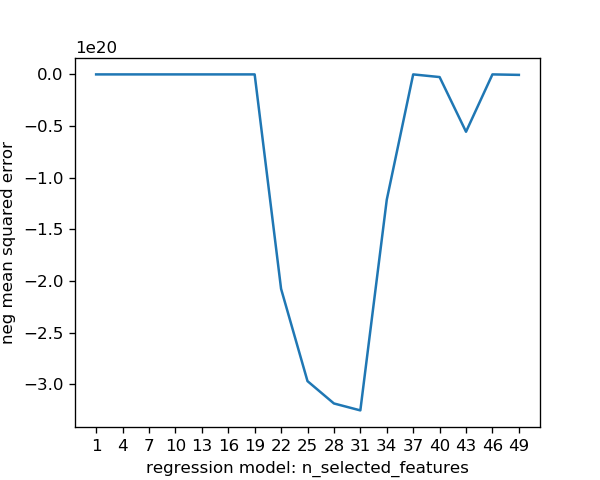

In [98]:
newfig = plt.figure(figsize=(5,4))
s_numbering = pd.Series(xvalid_mean_regression.index).apply(lambda x:x[9:]).astype(np.int)
xvalid_mean_regression.index = s_numbering
figXvalReg = xvalid_mean_regression.plot.line()

In [99]:
figXvalReg.set_xlabel('regression model: n_selected_features')
figXvalReg.set_ylabel('neg mean squared error')
figXvalReg.set_xticks(s_numbering)

In [100]:
xvalid_mean_regression.sort_values(ascending=False)

46   -1.088597e-01
37   -1.112475e-01
13   -7.361072e-01
10   -7.429452e-01
7    -8.567527e-01
4    -9.730530e-01
1    -1.017502e+00
19   -3.004061e+13
16   -1.247354e+15
49   -4.667640e+17
40   -2.579319e+18
43   -5.554416e+19
34   -1.214097e+20
22   -2.076712e+20
25   -2.970702e+20
28   -3.186984e+20
31   -3.254196e+20
dtype: float64

<IPython.core.display.Javascript object>


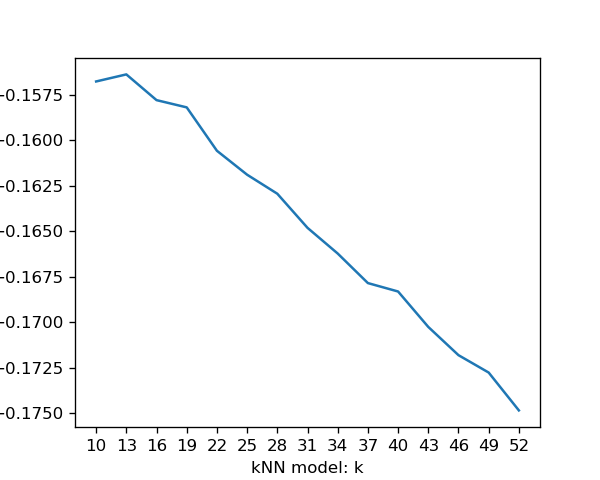

In [101]:
newfig = plt.figure(figsize=(5,4))
s_numbering = pd.Series(xvalid_mean_knnlwa.index).apply(lambda x:x[2:]).astype(np.int)
xvalid_mean_knnlwa.index = s_numbering
figXvalKnn = xvalid_mean_knnlwa.plot.line()

In [102]:
figXvalKnn.set_xlabel('kNN model: k')
figXvalKnn.set_ylabel('neg mean squared error')
figXvalKnn.set_xticks(s_numbering)

In [103]:
xvalid_mean_knnlwa.sort_values(ascending=False)

13   -0.156365
10   -0.156754
16   -0.157781
19   -0.158180
22   -0.160567
25   -0.161884
28   -0.162930
31   -0.164806
34   -0.166219
37   -0.167846
40   -0.168309
43   -0.170258
46   -0.171811
49   -0.172768
52   -0.174850
dtype: float64